# Here I am training the data in **train.csv file** 

In [1]:
### Project part 1-4 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Here I am importing the data

data_train = pd.read_csv("train.csv")

data_train.head() 


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [2]:
data_train.shape

(14999, 9)

In [3]:

# Here I am changing categories to numerical values

category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}

data_train["category"] = data_train["category"].map(category)

data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


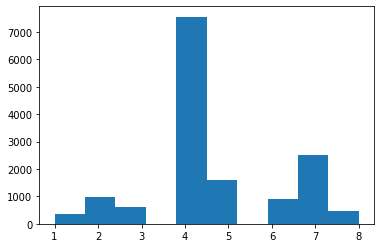

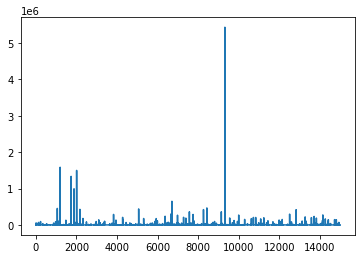

In [4]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()


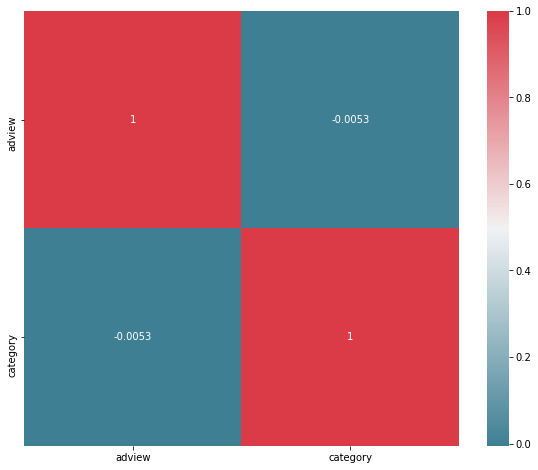

In [5]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))

corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()


In [6]:

# Here I am removing the character 'F' from the given dataset 

data_train=data_train[data_train.views !='F']
data_train=data_train[data_train.likes !='F']
data_train=data_train[data_train.dislikes !='F']
data_train=data_train[data_train.comment !='F']

data_train.head()



,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
# Here I am converting the data to numeric format which right now is in a string format 

data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

## storing it in a column named column_vivid

column_vivid = data_train['vidid']        




In [8]:

from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [9]:

# Converting Time in sec for duration (part of data transformation)

import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']

    for i in y:
      if i not in P:
        mm+=i
      else:
        if (i=="H"):
          h = mm
          mm = ''
        elif (i == "M"):
          m = mm
          mm = ''
        else:
          s = mm
          mm = ''

    if (h==''):
      h = '00'
    if (m == ''):
      m = '00'
    if (s==''):
      s='00'
    bp = h+':'+m+':'+s
    return bp


train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)


def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)


time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [10]:
### Project Part 5

# Split Data

Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])

data_train=data_train.drop(['adview'], axis=1)
data_train=data_train.drop(['vidid'], axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

Y_train

,target
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [12]:

# Normalise Data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

print(X_train.mean())
print(X_test.mean())

0.1739096800320488
0.17614792076344343


In [13]:
### Project part 6 and 7 

# Evaluation Metrics

from sklearn import metrics

def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



In [14]:

# Linear Regression

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)




Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [15]:

# Support Vector Regressor

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [16]:

# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)



Mean Absolute Error: 2567.5536202185795
Mean Squared Error: 874222779.6089481
Root Mean Squared Error: 29567.258574459487


In [17]:

# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)

random_forest.fit(X_train,y_train)

print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Mean Absolute Error: 3238.281330066957
Mean Squared Error: 574223937.3404809
Root Mean Squared Error: 23962.97012768828


In [ ]:
### Project Part 8-10

# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                               Dense(6, activation="relu",
                                     input_shape=X_train.shape[1:]),
                               Dense(6,activation="relu"),
                               Dense(1)
                               ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


#Saving Scikitlearn models

import joblib

joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")


# Here I am operating the data in the **test.csv file** i.e. first cleaning and then predicting






In [19]:
### Project part 1-4 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Here I am importing the data

data_test = pd.read_csv("test.csv")

data_test.head() 


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [20]:
data_test.shape

(8764, 8)

In [21]:
# Here I am changing categories to numerical values

category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}

data_test["category"] = data_test["category"].map(category)

data_test.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


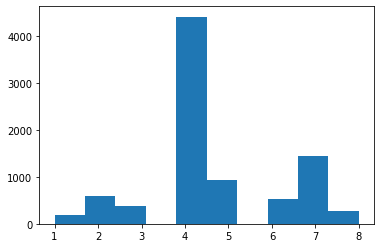

In [22]:
# Visualization
# Individual Plots
plt.hist(data_test["category"])
plt.show()


In [23]:
# Here I am removing the character 'F' from the given dataset 

data_test=data_test[data_test.views !='F']
data_test=data_test[data_test.likes !='F']
data_test=data_test[data_test.dislikes !='F']
data_test=data_test[data_test.comment !='F']

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [24]:
# Here I am converting the data to numeric format which right now is in a string format 



data_test['views'] = pd.to_numeric(data_test['views'])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

## storing it in a column named column_vivid



In [25]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])

data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2053,2115,2
1,VID_18629,1040132,8171,340,1047,1825,2055,6
2,VID_13967,28534,31,11,1,1009,1506,4
3,VID_19442,1316715,2284,250,274,116,2265,7
4,VID_770,1893173,2519,225,116,1892,1625,2


In [26]:
# Converting Time in sec for duration (part of data transformation)

import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']

    for i in y:
      if i not in P:
        mm+=i
      else:
        if (i=="H"):
          h = mm
          mm = ''
        elif (i == "M"):
          m = mm
          mm = ''
        else:
          s = mm
          mm = ''

    if (h==''):
      h = '00'
    if (m == ''):
      m = '00'
    if (s==''):
      s='00'
    bp = h+':'+m+':'+s
    return bp


test=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)


def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)


time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2053,449,2
1,VID_18629,1040132,8171,340,1047,1825,389,6
2,VID_13967,28534,31,11,1,1009,2274,4
3,VID_19442,1316715,2284,250,274,116,595,7
4,VID_770,1893173,2519,225,116,1892,188,2


In [28]:
### Project Part 5

# Split Data

B_train = pd.DataFrame(data = data_test.iloc[:, 1].values, columns = ['target'])
data_test=data_test.drop(['vidid'], axis=1)

data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [35]:
# Normalise Data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_test=scaler.fit_transform(data_test)
data_test.mean()

0.16965883079102045

# Using my best model i.e. **Random Forest Regressor** to predict the 'adview' values for test.csv file 

In [40]:

# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)

random_forest.fit(X_train,y_train)

adview_predictions = random_forest.predict(data_test)
print(adview_predictions)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


[ 870.31301145 1672.38869214  214.84885647 ...  412.55476714    9.42130725
  139.09166645]


In [41]:
import numpy as np
import pandas as pd

adview_predictions = pd.DataFrame(adview_predictions, columns=['adview_predictions']).to_csv('test.csv')

In [45]:
data_test.shape 

(8549, 7)